# Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

# Import necessary Python Modules¶

In [232]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
	

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

import pickle
import warnings
warnings.filterwarnings('ignore')

# DATA EXPLORATION

In [233]:
#Read in the Avocado Prices csv file as a DataFrame called df

In [234]:
#loadindg the data set
df = pd.read_csv('avocado.csv')
#print first 5 rows of the dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Understanding the Avocado Dataset
Lets check our data shape:
Dataset has 18249 rows and 14 columns.

In [235]:
#Data Summary
df.shape

(18249, 14)

In [236]:
#find duplicates
df.duplicated().sum()

0

In [237]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

Date             object
type             object
region           object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
Unnamed: 0        int64
year              int64
dtype: object

In [238]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of Unnamed: 0 

0     432
3     432
11    432
10    432
9     432
8     432
6     432
5     432
4     432
7     432
2     432
1     432
34    324
28    324
41    324
48    324
26    324
42    324
32    324
27    324
43    324
12    324
44    324
13    324
29    324
45    324
14    324
30    324
46    324
15    324
31    324
25    324
40    324
50    324
37    324
18    324
19    324
35    324
20    324
36    324
49    324
24    324
21    324
33    324
22    324
38    324
16    324
23    324
39    324
17    324
47    324
51    322
52    107
Name: Unnamed: 0, dtype: int64
*******************************************************
*******************************************************
Value counts of Date 

2016-09-18    108
2017-12-10    108
2017-07-16    108
2015-10-25    108
2016-03-27    108
             ... 
2015-12-20    108
2017-01-29    108
2017-06-25    107
2017-06-18    107
2015-12-06    107
Name: Date, Length: 1

# OBSERVATIONS OF THE DATASET (FROM VALUE COUNTS)

# DROPPING THE COLUMNS

In [239]:
df=df.drop(columns = ['Unnamed: 0'])

In [240]:
#Data Summary
df.shape

(18249, 13)

In [241]:
df.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [242]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [243]:
#We have now added a feature Month & Day, so we now do not need the feature Date as Day, Month & Year already have been sepearted.

In [244]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Earlier in info we have seen that Date is Object type not the date type. We have to change its type to date type.

# Let's see which type of Avocados are more in demand (Conventional or Organic)

In [245]:
import plotly.offline as py
Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

# Let's see how Average price is distributed over the months for Conventional and Organic Types.

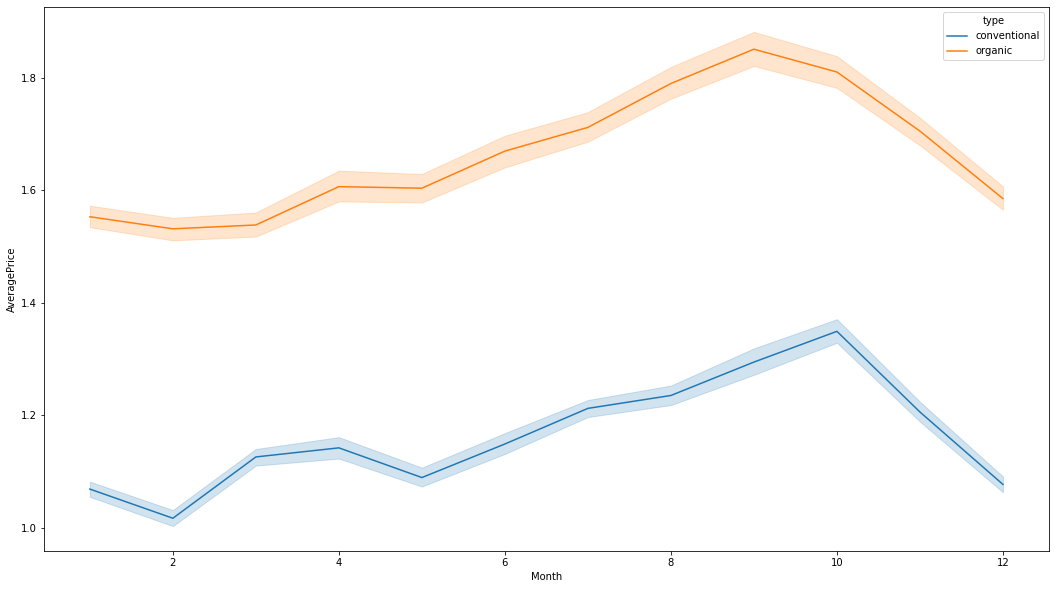

In [246]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

In [247]:
#Looks like there was a hike between months 8 – 10 for both Conventional and Organic type of Avocados prices

# Now lets plot Average price distribution based on region

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

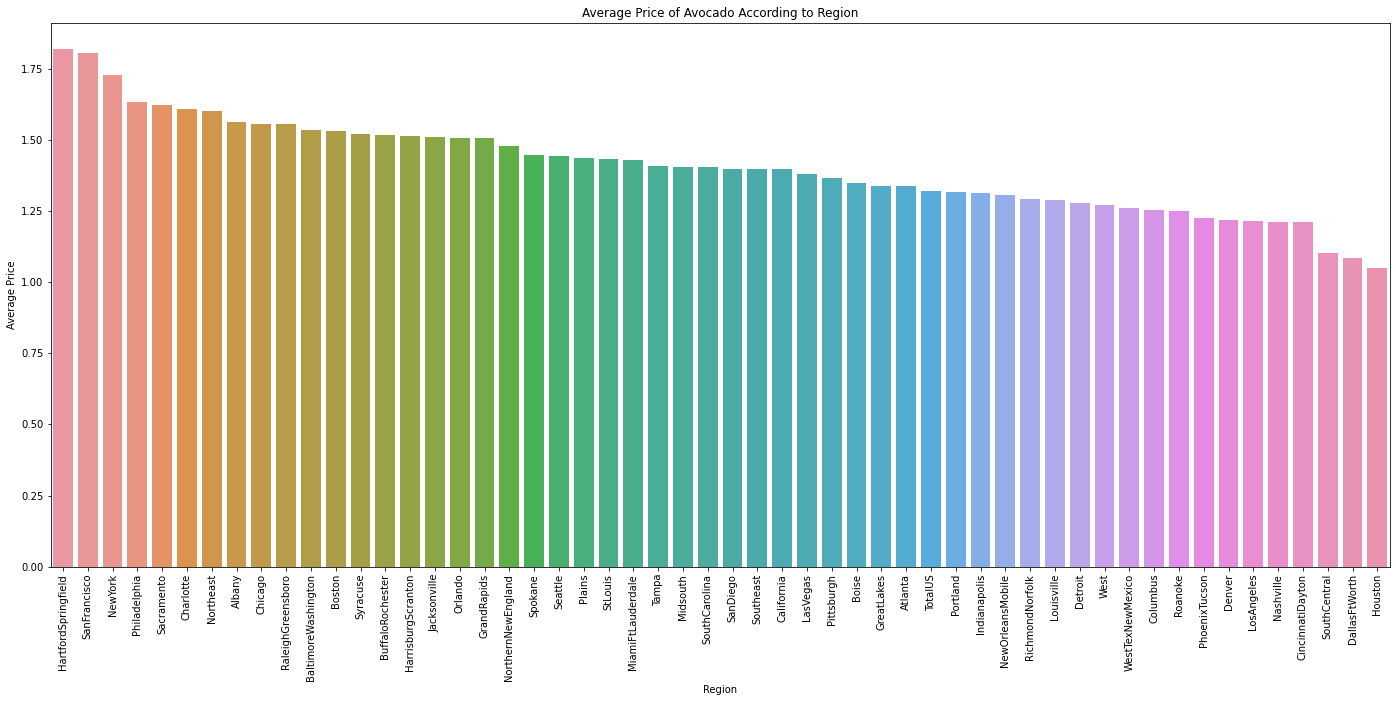

In [248]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

# TOP 5 regions where Average consumption is very high

Text(0.5, 1.0, 'Average of Total Volume According to Region')

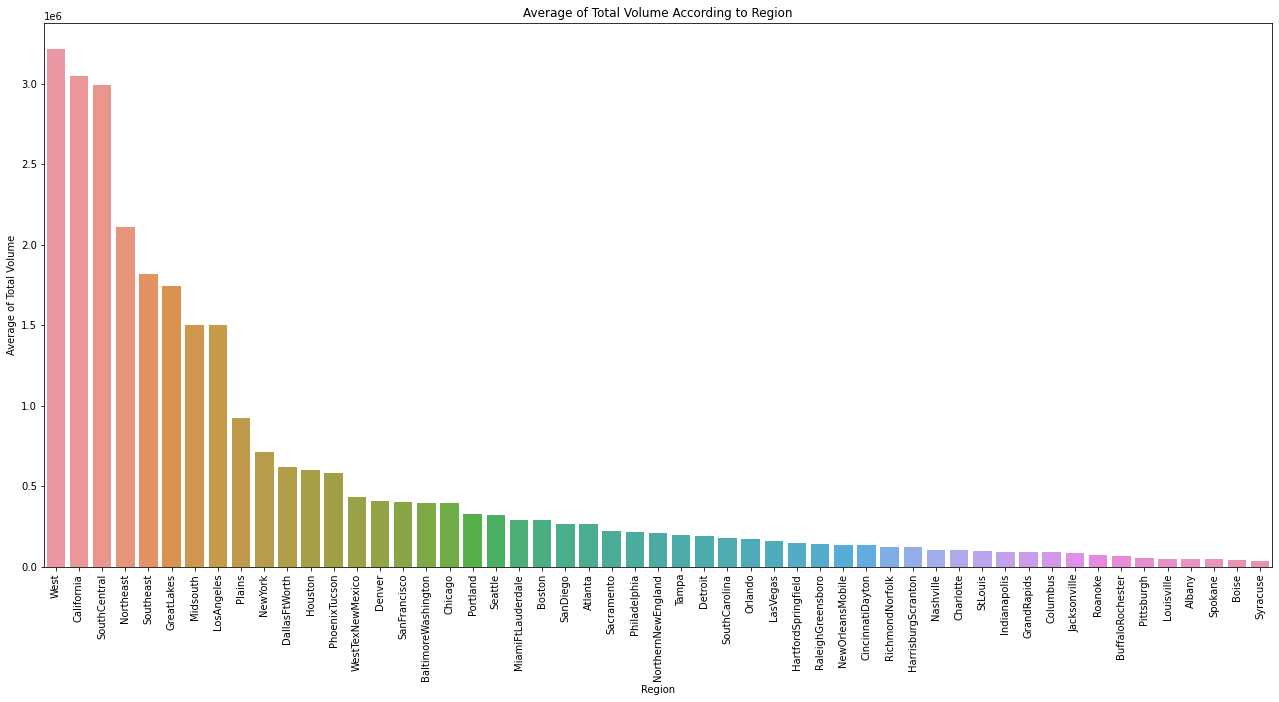

In [249]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

# Year and the region for which the Average price was the highest

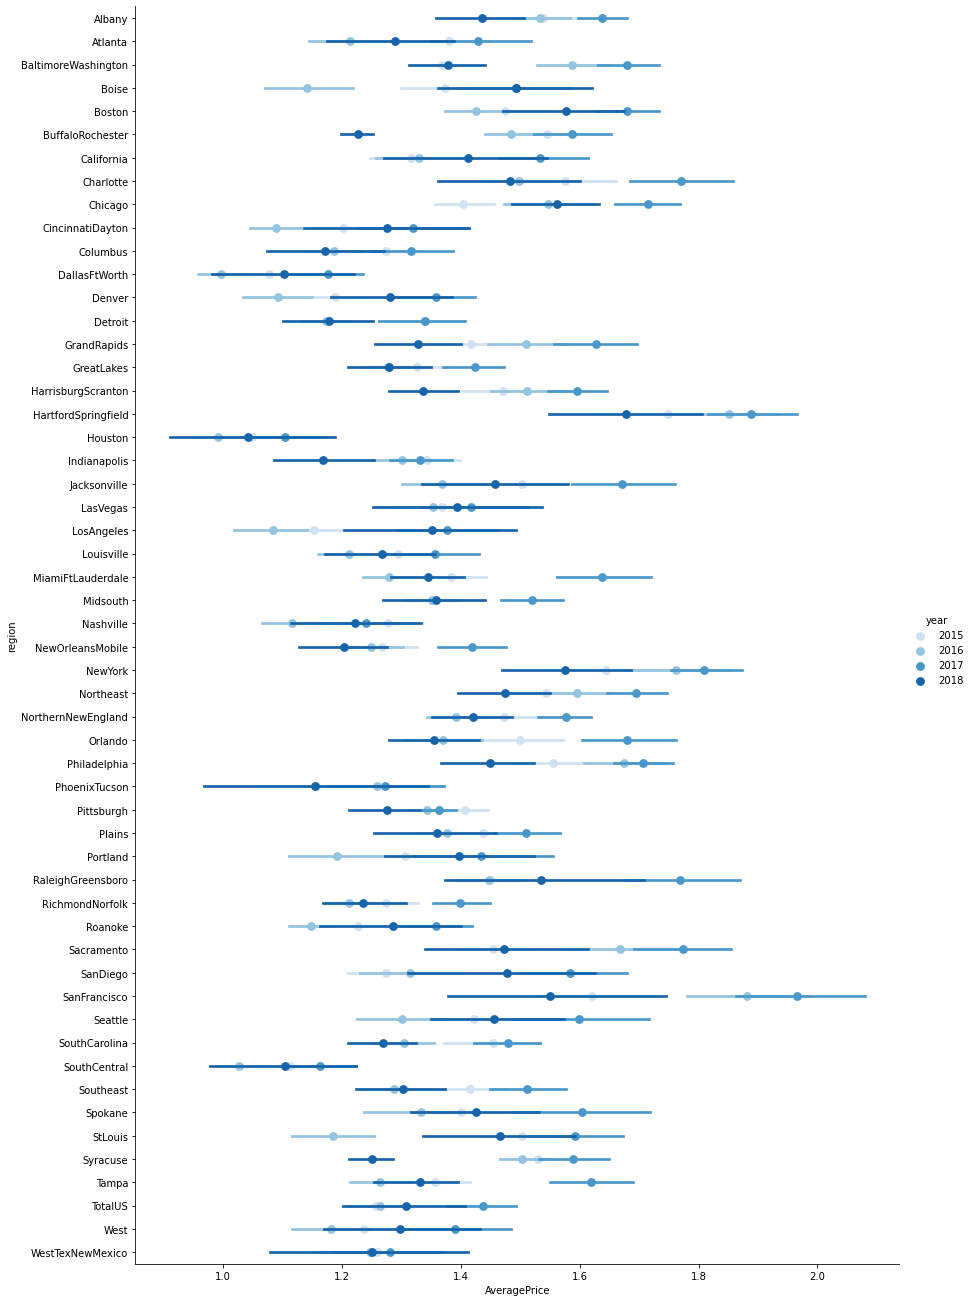

In [250]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

# Let's see how price is distributed over the date column

Text(0.5, 1.0, 'Average Price')

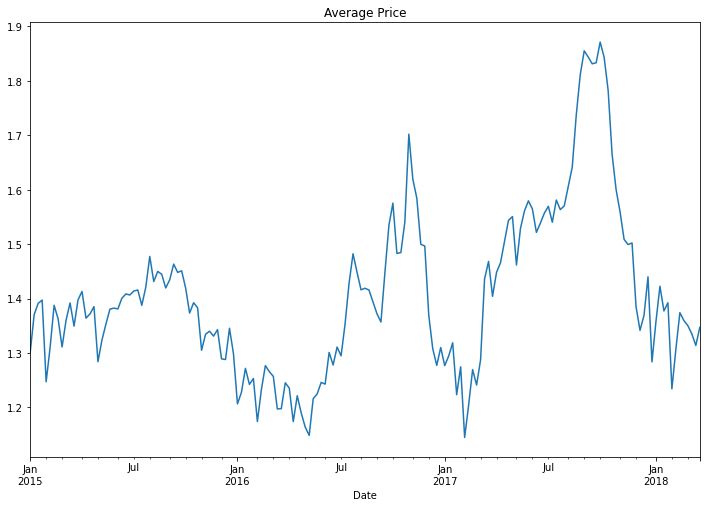

In [251]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

conventional    9126
organic         9123
Name: type, dtype: int64

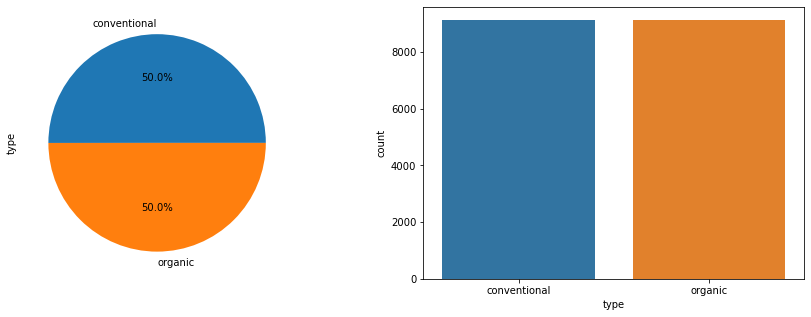

In [252]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['type'])
df['type'].value_counts()

In [253]:
#These two types organic and conventional are almost equal and balanced.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

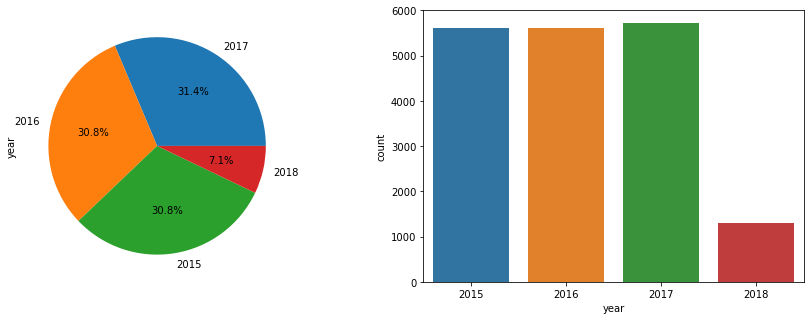

In [254]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['year'])
df['year'].value_counts()

In [255]:
#Most of the data is from 2017 followed by 2016 and 2015 respectively, while 2018 has the least data.

Total number of regions 54


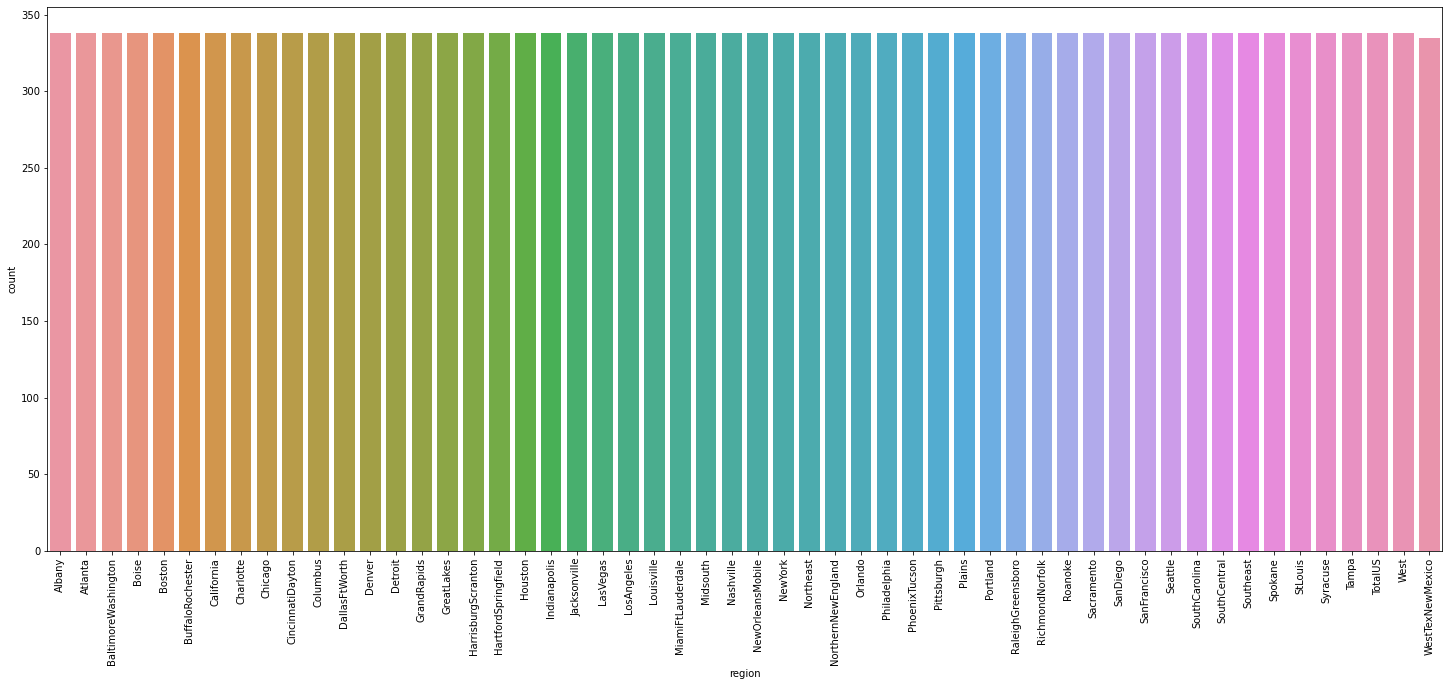

In [256]:
plt.figure(figsize=(25,10))
sns.countplot(df['region'])
plt.xticks(rotation=90)
print('Total number of regions',df['region'].nunique())

In [257]:
#There are 54 regions in total. All the region produces almost equal amounts of avocados except for west tex new mexico which has slightly less number.

<AxesSubplot:xlabel='year', ylabel='region'>

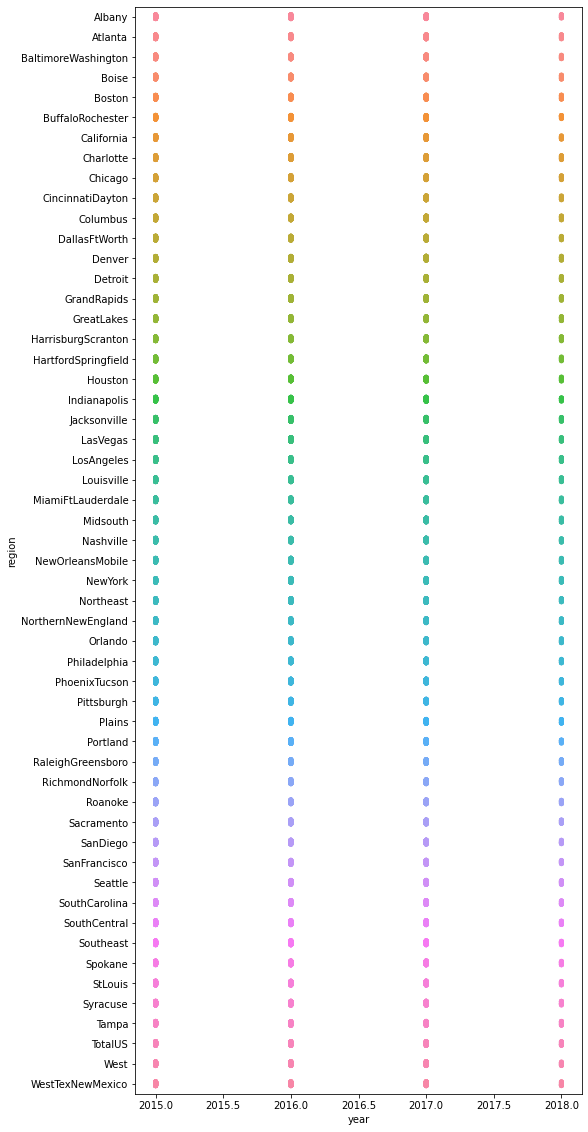

In [258]:
plt.figure(figsize=(8,20))
sns.stripplot(x='year',y='region',data=df)

In [259]:
#Avocados are collected from all the regions irrespective of the year. For each year avocados are collected from all the same regions.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

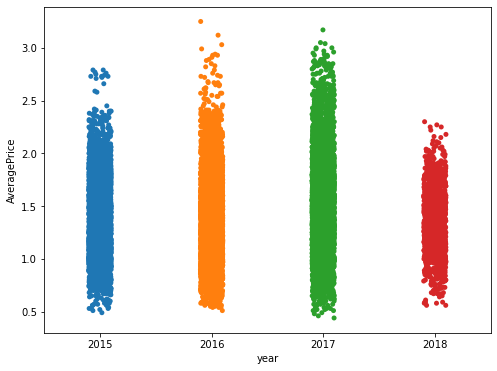

In [260]:
plt.figure(figsize=(8,6))
sns.stripplot(x='year',y='AveragePrice',data=df)

In [261]:
#Average price is highest in the year 2016, but relatively price seem to increase as the time passes except for the year 2018 which is an exception.

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

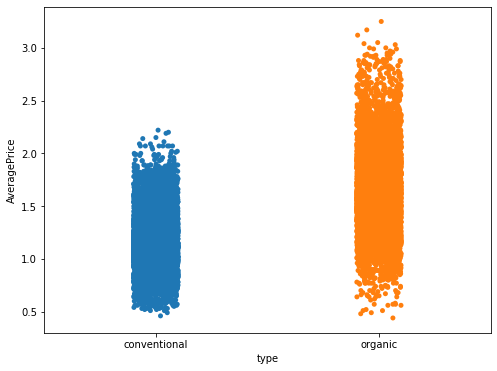

In [262]:
plt.figure(figsize=(8,6))
sns.stripplot(x='type',y='AveragePrice',data=df)

In [263]:
#Organic Avacoados are more expensive than the conventional ones.

In [264]:
#Dropping Date, as the Day, Month & Year have been seperately termed as a feature.

In [265]:
df.drop('Date',axis=1,inplace=True)

In [266]:
#We replace 2015 by 1 and 2016 by 2 and so on... for more simplicity
df['year'].replace(2015,1,inplace=True)
df['year'].replace(2016,2,inplace=True)
df['year'].replace(2017,3,inplace=True)
df['year'].replace(2018,4,inplace=True)

In [267]:
#we create a time column using year,month and day column and then drop these 3.
df['Time']=(df['year']*365)+(df['Month']*30)+(df['Day'])
df.drop(['year','Month','Day'],axis=1,inplace=True)

In [268]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Time
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,752
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,745
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,738
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,731
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,724
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,1524
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,1518
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,1511
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,1504


# ENCODING
#Let's encode the object data type features into integer data types.


In [269]:
from sklearn.preprocessing import OrdinalEncoder
o=OrdinalEncoder()

In [270]:
df['region']=o.fit_transform(df['region'].values.reshape(-1,1))
df['type']=o.fit_transform(df['type'].values.reshape(-1,1))

In [271]:
df.rename(columns={'Total Volume': 'TotalVolume', '4046': 'f4046', '4225': 'f4225','4770': 'f4770', '4046': 'f4046','Total Bags': 'TotalBags', 'Small Bags': 'SmallBags', 'XLarge Bags': 'XLargeBags'}, inplace=True)

In [272]:
df

,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,752
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,745
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,738
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,731
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,724
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,53.0,1524
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,53.0,1518
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,53.0,1511
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,53.0,1504


In [273]:
#checking the datatypes post encoding
df.dtypes

AveragePrice    float64
TotalVolume     float64
f4046           float64
f4225           float64
f4770           float64
TotalBags       float64
SmallBags       float64
Large Bags      float64
XLargeBags      float64
type            float64
region          float64
Time              int64
dtype: object

In [274]:
#encoding might have created a few duplicate columns
df.duplicated().sum()

0

In [275]:
df.describe()

,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,26.495644,984.962025
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,15.583788,340.861886
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,399.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,13.000000,690.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,26.000000,984.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,40.000000,1279.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,53.000000,1575.000000


In [276]:
#Let's check the correlation between the features and label
df.corr()

,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,-0.011716,0.145024
TotalVolume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.174176,0.009374
f4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.192073,-0.004912
f4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,0.145726,-0.016817
f4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,0.095252,-0.047397
TotalBags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.175256,0.064821
SmallBags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.164702,0.057037
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.198768,0.081969
XLargeBags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.082281,0.077534
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000280,-0.000059


<AxesSubplot:>

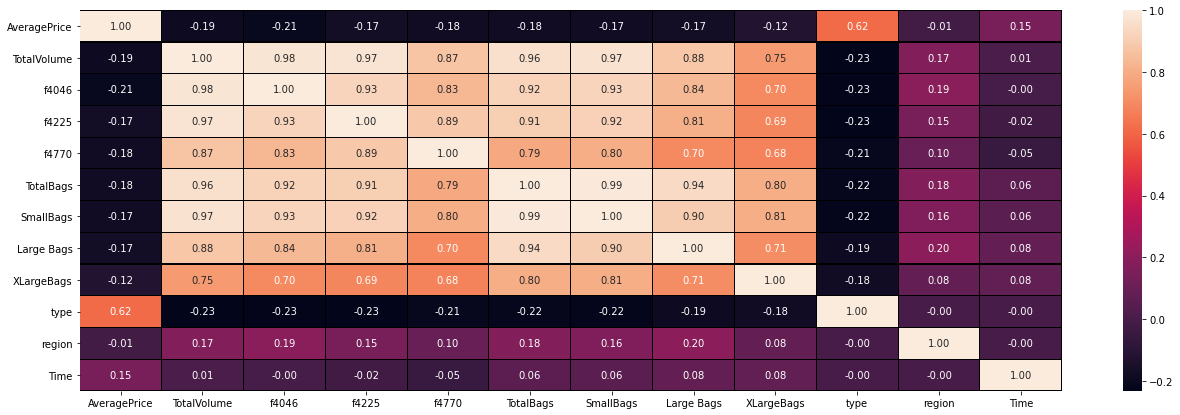

In [277]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [278]:
#There is not much correlation between the target "AveragePrice" and Features
#There is high correlation (Mulicollinearity) between TotalVolumne, 4046, 4225, 4770, TotalBags, SmallBags, LargeBags, XlargeBags

#We will treat multicollinearity with regularisation 

# REGRESSION TASK = FIND AVERAGEPRICE

In [326]:
#backup the dataset
df2 = df #regression
df3 = df #classification

# DIVIDE DATA INTO FEATURES & LABEL (REGRESSION)

In [158]:
#diving the columns in feature and label
X = df2.drop(columns=['AveragePrice'])
y = df2['AveragePrice']

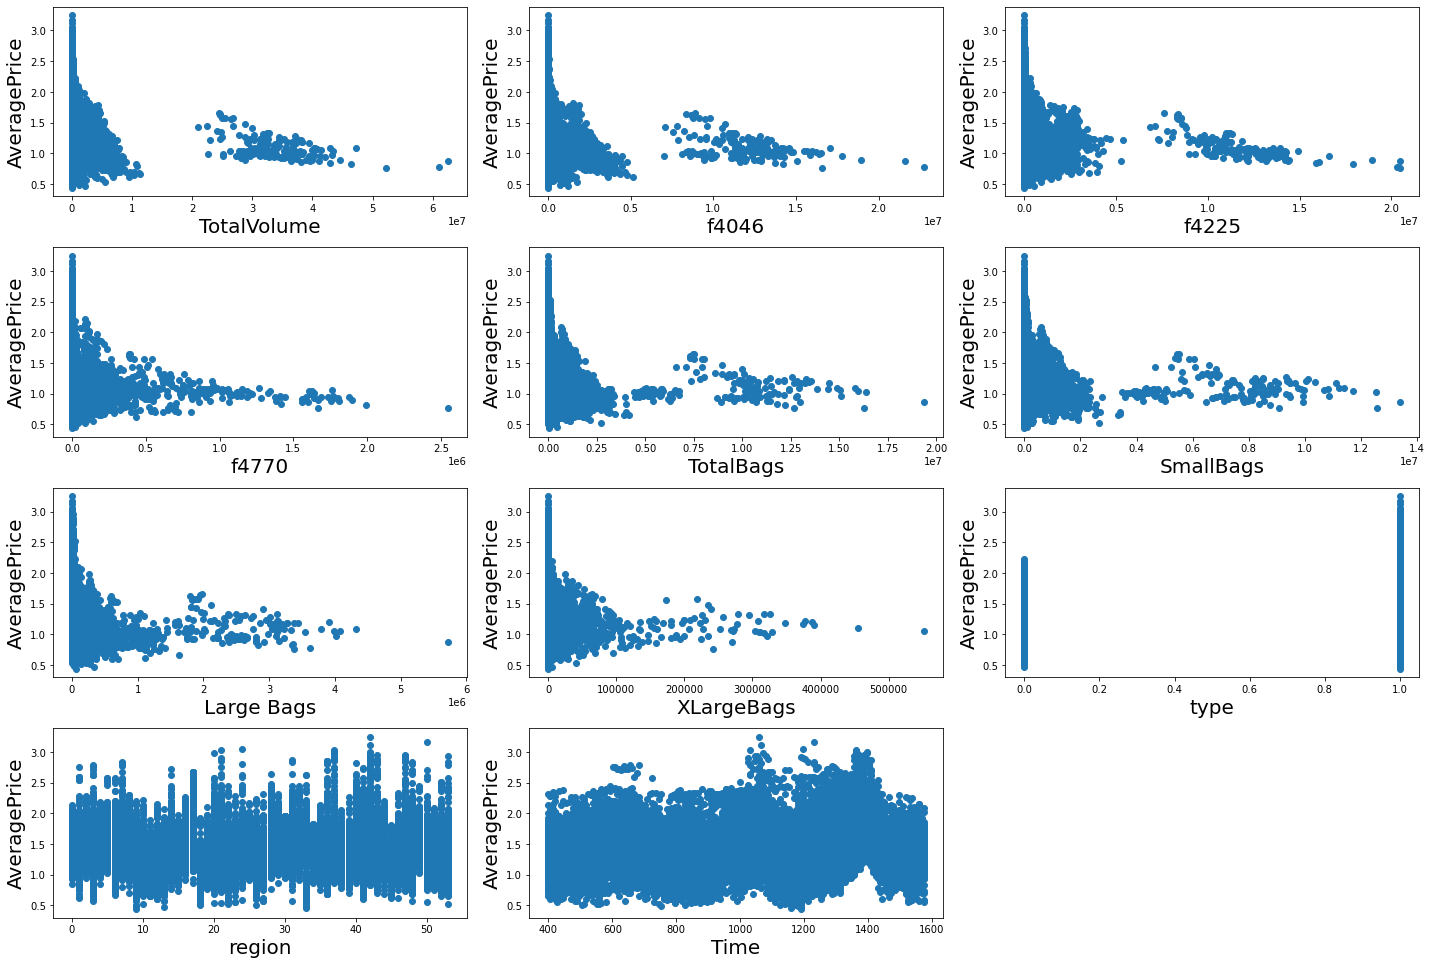

In [51]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
	if plotnumber<=30: 
		ax=plt.subplot(10,3,plotnumber)
		plt.scatter(X[column],y)
		plt.xlabel(column,fontsize=20)
		plt.ylabel('AveragePrice', fontsize=20)
	plotnumber+=1
plt.tight_layout()

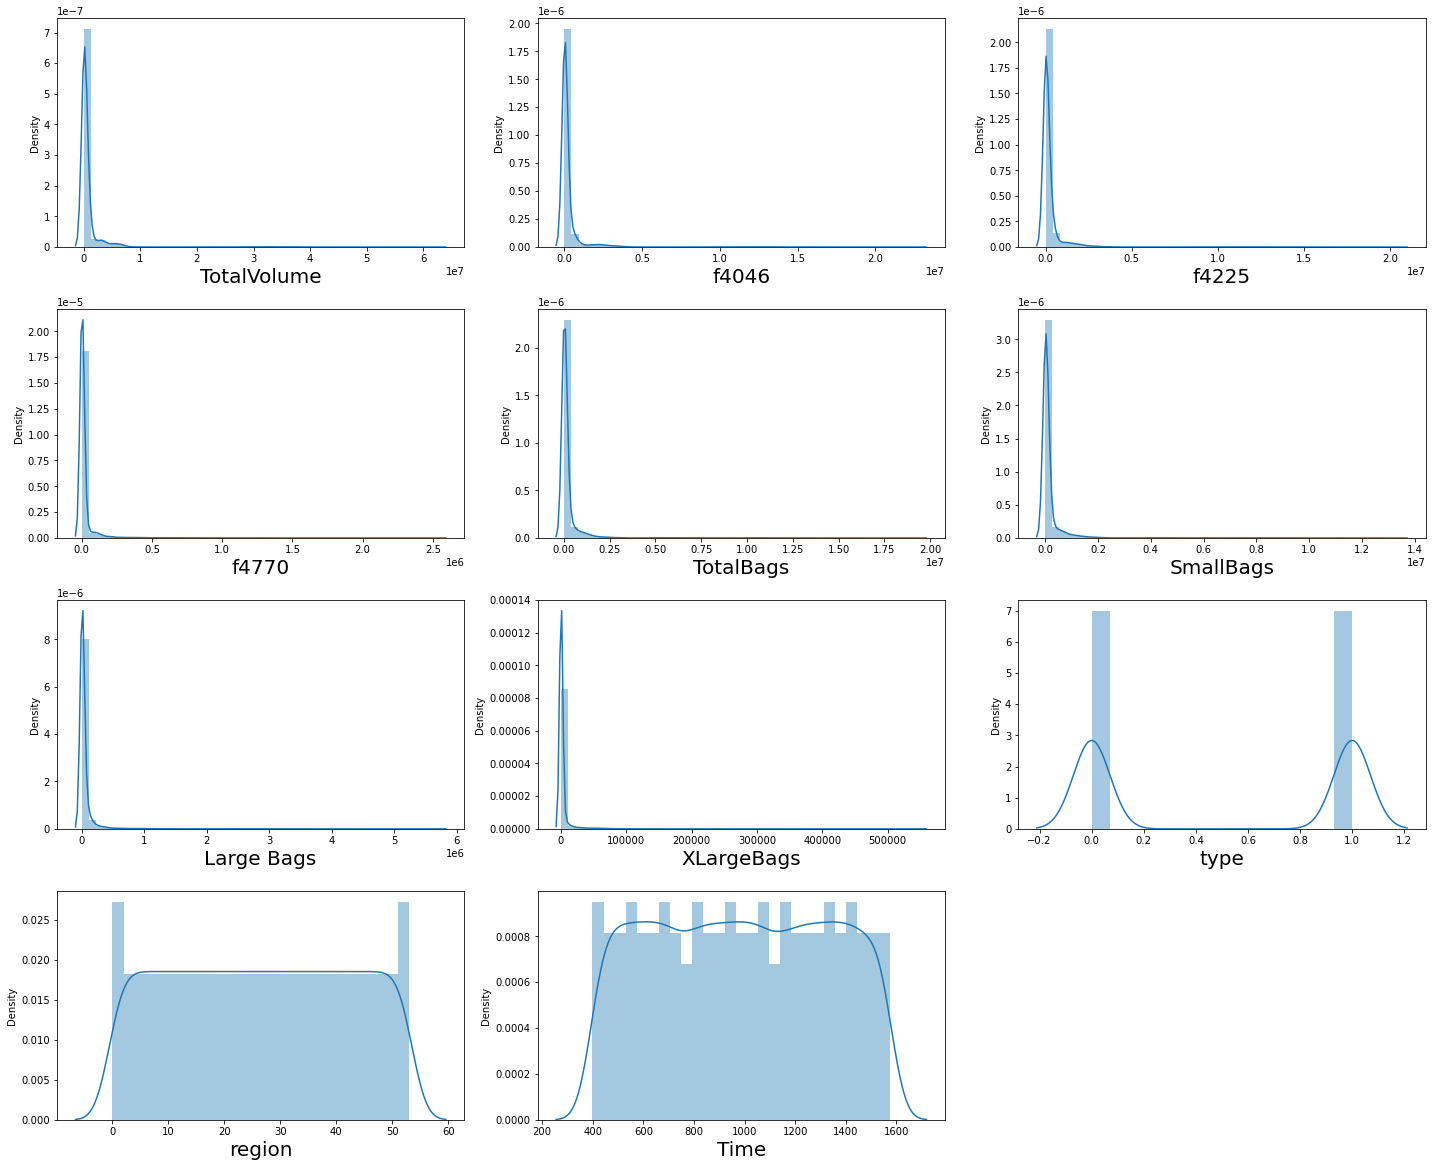

In [53]:
#Visualise the distribution of data in the feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# REMOVING SKEWNESS & OUTLIERS FROM THE DATASET¶

In [54]:
#Checking skewness of the features
df2.skew().sort_values(ascending=False)

XLargeBags      13.139751
f4770           10.159396
Large Bags       9.796455
TotalBags        9.756072
SmallBags        9.540660
TotalVolume      9.007687
f4225            8.942466
f4046            8.648220
AveragePrice     0.580303
Time             0.003328
type             0.000329
region           0.000030
dtype: float64

In [55]:
#We can see skewness in few of our columns, we will remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
df2_new = power_transform(df2)
df2=pd.DataFrame(df2_new,columns=df2.columns)
df2.skew().sort_values(ascending=False) #validating that the skewness is removed

XLargeBags      0.793520
f4770           0.032184
TotalVolume     0.011171
SmallBags       0.007058
AveragePrice    0.005596
type            0.000329
TotalBags      -0.001626
f4225          -0.017740
f4046          -0.022679
Large Bags     -0.073809
Time           -0.113117
region         -0.261443
dtype: float64

In [56]:
df2['AveragePrice'] = df['AveragePrice'] #giving back the original values of target column

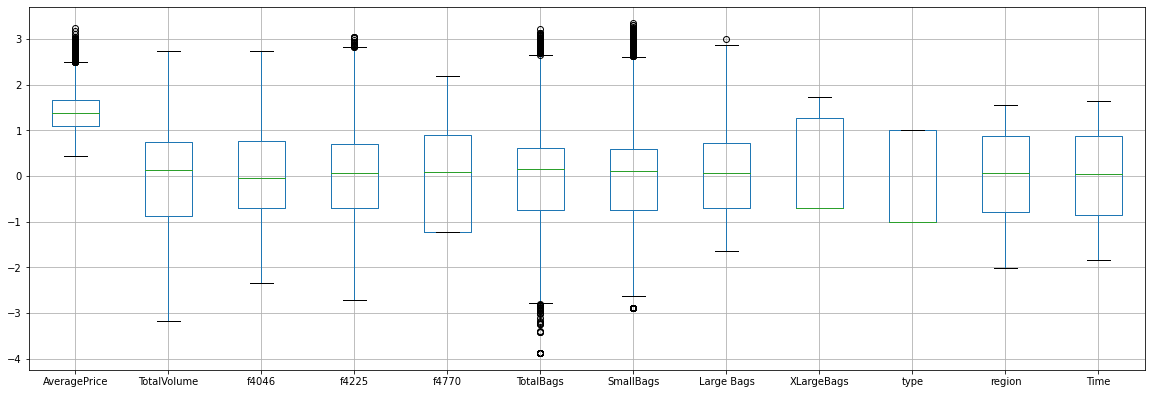

In [57]:
##Visualizing the outliers using BOXPLOT
df2.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [58]:
#There are outliers in 4225 (higher quantile) , Total Bags (Both) , Small Bags (Higher Quantile)
#We will use IQR method to remove these outliers

In [59]:
#removing outliers using IQR
from scipy.stats import iqr
#find the IQR
#1st Quantile
q1=df2.quantile(0.25)
#3rd Quantile
q3=df2.quantile(0.75)

iqr = q3-q1

In [60]:
#feature = TotalBags (outlier in higher side)
TotalBags_high = (q3.TotalBags+(1.5*iqr.TotalBags)) 
index=np.where(df2['TotalBags']>TotalBags_high)
df2=df2.drop(df2.index[index])
df2.reset_index()

,index,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
0,0,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-2.011552,-0.650329
1,1,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-2.011552,-0.672084
2,2,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-2.011552,-0.693891
3,3,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-2.011552,-0.715752
4,4,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-2.011552,-0.737667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18127,18244,1.63,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.543838,1.515480
18128,18245,1.71,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.543838,1.499971
18129,18246,1.87,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.543838,1.481858
18130,18247,1.93,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.543838,1.463723


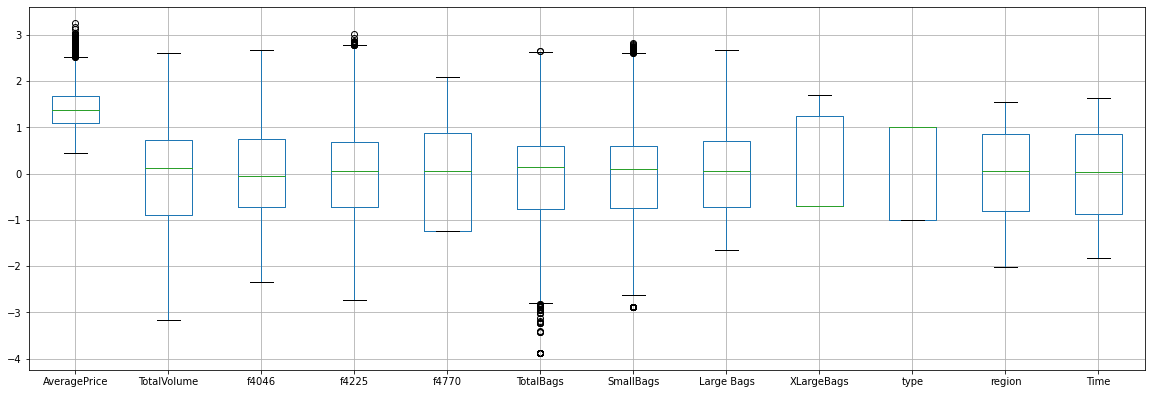

In [61]:
#Rechecking the outliers using boxplot after using IQR method
df2.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [62]:
#feature = TotalBags (outlier in lower side)
TotalBags_low=(q1.TotalBags-(1.5*iqr.TotalBags))
index=np.where(df2['TotalBags']<TotalBags_low)
df2=df2.drop(df2.index[index])
df2.reset_index()

,index,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
0,0,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-2.011552,-0.650329
1,1,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-2.011552,-0.672084
2,2,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-2.011552,-0.693891
3,3,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-2.011552,-0.715752
4,4,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-2.011552,-0.737667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18081,18244,1.63,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.543838,1.515480
18082,18245,1.71,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.543838,1.499971
18083,18246,1.87,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.543838,1.481858
18084,18247,1.93,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.543838,1.463723


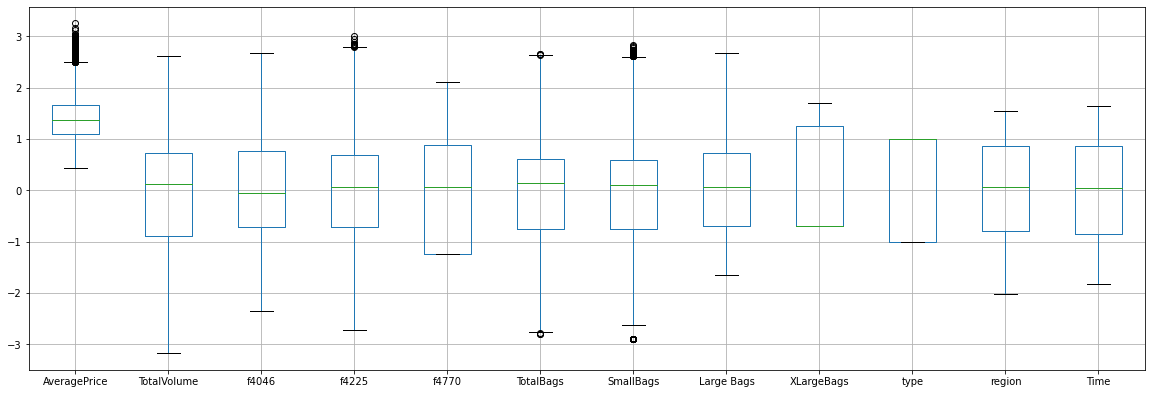

In [63]:
#Rechecking the outliers using boxplot after using IQR method
df2.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [64]:
#feature = SmallBags (outlier in higher side)
SmallBags_high = (q3.SmallBags+(1.5*iqr.SmallBags)) 
index=np.where(df2['SmallBags']>SmallBags_high)
df2=df2.drop(df2.index[index])
df2.reset_index()

,index,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
0,0,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-2.011552,-0.650329
1,1,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-2.011552,-0.672084
2,2,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-2.011552,-0.693891
3,3,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-2.011552,-0.715752
4,4,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-2.011552,-0.737667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18045,18244,1.63,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.543838,1.515480
18046,18245,1.71,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.543838,1.499971
18047,18246,1.87,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.543838,1.481858
18048,18247,1.93,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.543838,1.463723


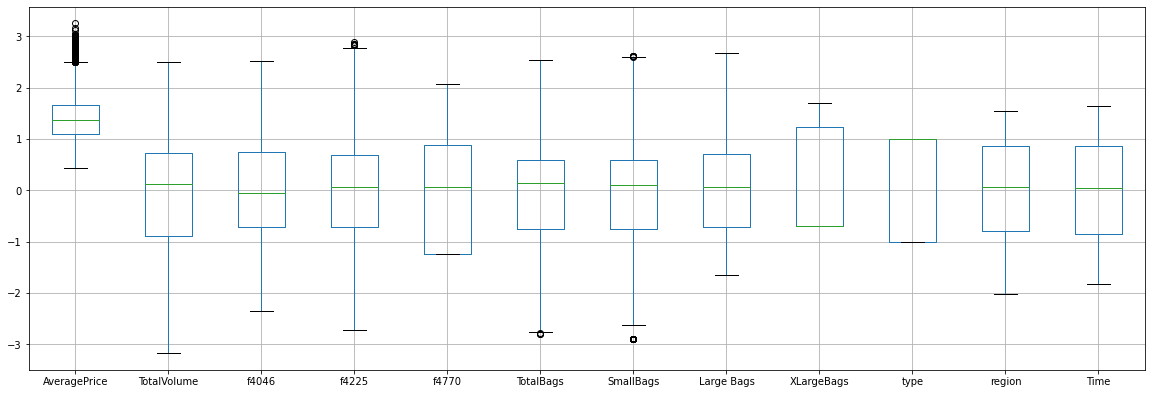

In [65]:
#Rechecking the outliers using boxplot after using IQR method
df2.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [66]:
df2.shape

(18050, 12)

In [67]:
#loss of data

print(((18249-18050)/18249)*100)

1.0904707107238751


In [68]:
#Hence, 1.1% loss of data which is 199 entries

In [69]:
#divide into feature (X) and target (y)

In [159]:
#diving the columns in feature and label
X = df2.drop(columns=['AveragePrice'])
y = df2['AveragePrice']

In [160]:
#Data Scaling
scaler = StandardScaler()

In [161]:
xd=scaler.fit_transform(X)
X=pd.DataFrame(xd,columns=X.columns)

In [116]:
#Finding best random_state
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
for i in range(0,100):
	x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
	lr.fit(x_train,y_train)
	y_pred_train=lr.predict(x_train)
	y_pred=lr.predict(x_test)
	print(f"At random state {i},the training accuracy is:- {r2_score(y_train,y_pred_train)}")
	print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,y_pred)}")
	print("\n")

At random state 0,the training accuracy is:- 0.5513071831626096
At random state 0,the testing accuracy is:- 0.5414343147800957


At random state 1,the training accuracy is:- 0.5484583303634556
At random state 1,the testing accuracy is:- 0.5527333721067145


At random state 2,the training accuracy is:- 0.5521063521700857
At random state 2,the testing accuracy is:- 0.5376633838415537


At random state 3,the training accuracy is:- 0.5509487093953145
At random state 3,the testing accuracy is:- 0.5425989026653057


At random state 4,the training accuracy is:- 0.5499283434769953
At random state 4,the testing accuracy is:- 0.5468022949802194


At random state 5,the training accuracy is:- 0.5494941682281362
At random state 5,the testing accuracy is:- 0.5484200617351771


At random state 6,the training accuracy is:- 0.5484433824472954
At random state 6,the testing accuracy is:- 0.5530477693140037


At random state 7,the training accuracy is:- 0.546840786029305
At random state 7,the testing accu

At random state 65,the testing accuracy is:- 0.5593798315614064


At random state 66,the training accuracy is:- 0.5510262976207356
At random state 66,the testing accuracy is:- 0.5424723137359653


At random state 67,the training accuracy is:- 0.5517205714104607
At random state 67,the testing accuracy is:- 0.5398724989383161


At random state 68,the training accuracy is:- 0.5508912035208121
At random state 68,the testing accuracy is:- 0.543208964747099


At random state 69,the training accuracy is:- 0.5489547941716071
At random state 69,the testing accuracy is:- 0.5506991760946283


At random state 70,the training accuracy is:- 0.5465477747390539
At random state 70,the testing accuracy is:- 0.5604749860799649


At random state 71,the training accuracy is:- 0.5499699531976796
At random state 71,the testing accuracy is:- 0.5467032100256666


At random state 72,the training accuracy is:- 0.5537612279513519
At random state 72,the testing accuracy is:- 0.5310548478240742


At random state 73

In [117]:
#best random state = 0

In [118]:
#Train Test Split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [119]:
model_name=[]
r2_scores=[]
rmse_value=[]

In [120]:
#Linear Regression
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


In [121]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

54.095957183326036
MAE: 0.21270517006835732
MSE: 0.07468518109042696
RMSE: 0.2732858962523075


In [122]:
model_name.append('Linear Regression')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

Text(0, 0.5, 'Predicted Y')

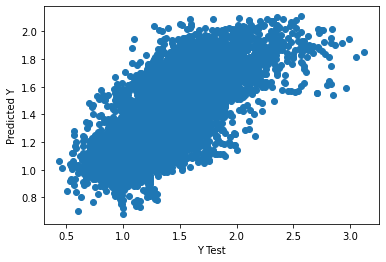

In [123]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [124]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)

In [125]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

76.1009688440421
MAE: 0.1271505078485688
MSE: 0.03888336103416436
RMSE: 0.1971886432687348


In [126]:
model_name.append('Decision Tree Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

Text(0, 0.5, 'Predicted Y')

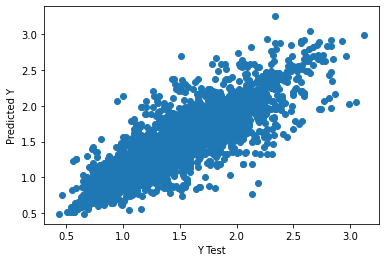

In [127]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [128]:
#RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
y_pred=rdr.predict(x_test)

In [129]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

89.47271251258198
MAE: 0.09059580794090491
MSE: 0.017127736995383197
RMSE: 0.13087298038702716


In [130]:
model_name.append('Random Forest Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

Text(0, 0.5, 'Predicted Y')

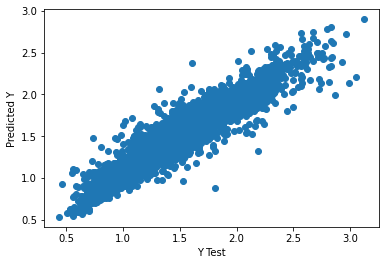

In [131]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [132]:
#SVR
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

In [133]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

73.21526883893114
MAE: 0.15072068824984325
MSE: 0.0435783511533369
RMSE: 0.2087542841556477


In [134]:
model_name.append('SVR')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

In [135]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)

In [136]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

60.395159417512886
MAE: 0.2043384598922023
MSE: 0.0644364746428419
RMSE: 0.253843405750163


In [137]:
model_name.append('ADA Boost')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

In [138]:
#XGB
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

In [139]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

90.6381336229658
MAE: 0.08899759047931802
MSE: 0.015231614533506993
RMSE: 0.12341642732435174


In [140]:
model_name.append('XGBoost')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

In [141]:
Regression_Scores

,Model Name,r2 Score,RMSE
0,Linear Regression,54.095957,0.273286
1,Decision Tree Regressor,76.100969,0.197189
2,Random Forest Regressor,89.472713,0.130873
3,SVR,73.215269,0.208754
4,ADA Boost,60.395159,0.253843
5,XGBoost,90.638134,0.123416


In [142]:
#R2 Score is the highest (90.64) and RMSE value is the loweest (0.12) for XGBoost Regressor, hence we will continue with XGB, but let's check the cv score first

,Y Test,Y Pred
812,1.09,1.011327
16563,1.44,1.383148
2472,1.13,1.120687
11748,1.49,1.553586
13441,2.00,1.971443


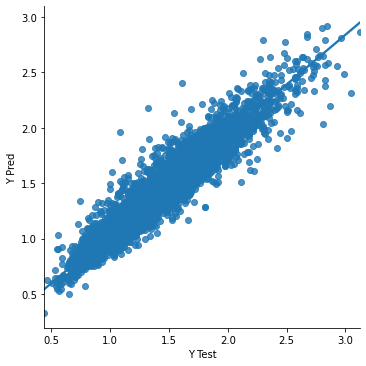

In [143]:
data = pd.DataFrame({'Y Test':y_test , 'Y Pred':y_pred},columns=['Y Test','Y Pred'])
sns.lmplot(x='Y Test',y='Y Pred',data=data,palette='rainbow')
data.head()

In [144]:
#CROSS VALIDATION
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,X,y,cv=5)
print("Cross validation score of Linear Regression Model", np.abs(scr.mean()))
scr1 = cross_val_score(ada,X,y,cv=5)
print("Cross validation score of Ada Boost Regressor Model", np.abs(scr1.mean()))
scr2 = cross_val_score(rdr,X,y,cv=5)
print("Cross validation score of Random Forest Regressor Model", np.abs(scr2.mean()))
scr3 = cross_val_score(xgb,X,y,cv=5)
print("Cross validation score of XGBoost Regression Model", np.abs(scr3.mean()))
scr4 = cross_val_score(dtr,X,y,cv=5)
print("Cross validation score of Decision Tree Model", np.abs(scr4.mean()))
scr5 = cross_val_score(svr,X,y,cv=5)
print("Cross validation score of SVR Model", np.abs(scr5.mean()))

Cross validation score of Linear Regression Model 21.90810031968911
Cross validation score of Ada Boost Model 4.903117134917971
Cross validation score of Random Forest Model 41.789282724169965
Cross validation score of XGBoost Regression Model 46.88631396706674
Cross validation score of Decision Tree Model 15.104604357296042
Cross validation score of SVR Model 28.504216662383463


In [101]:
#The cv score (0.47) also states XGBoost as the best regression model. Hence, we will now apply lasso regularisation to remove multicolinearity as well.

# Removing multicollinearity ussing L1 Regularisation

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(X,y)
print(m1.best_params_)

{'alpha': 0.001}


In [147]:
m1=Lasso(alpha=0.001)
m1.fit(X,y)

Lasso(alpha=0.001)

In [148]:
importance = np.abs(m1.coef_)

In [162]:
dfcolumns = pd.DataFrame(X.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores.sort_values(by=['Coefficients'],ascending=False)

,Features,Coefficients
4,TotalBags,0.255308
2,f4225,0.236550
0,TotalVolume,0.215568
8,type,0.180694
5,SmallBags,0.158369
10,Time,0.109103
6,Large Bags,0.048395
3,f4770,0.033870
9,region,0.015747
7,XLargeBags,0.002399


In [ ]:
#We shall drop column = f4046 & XLargeBags as they are highly correlated and this will solve the problem of multicollinearirty
#As f4046 has 0 coefficient and XLargeBags has 0.002 coefficient, hence they are least important features

In [163]:
X.drop(columns =['f4046', 'XLargeBags'],inplace=True)

In [164]:
X.columns

Index(['TotalVolume', 'f4225', 'f4770', 'TotalBags', 'SmallBags', 'Large Bags',
       'type', 'region', 'Time'],
      dtype='object')

In [ ]:
#We apply Hperparameter tuning on Xtreme Gradient Boost as it is giving the best performance for our dataset

In [173]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
#Train Test Split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [174]:
params={
 "learning_rate"    : [0.001,0.05, 0.10, ] ,
 "max_depth"        : [ 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [172]:
g=RandomizedSearchCV(XGBRegressor(verbosity=0),params,cv=10)

In [175]:
g.fit(x_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints...
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_al

In [176]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)
{'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.5}
0.9091062589680108


In [178]:
model=XGBRegressor(colsample_bytree=0.5,gamma=0.0,learning_rate=0.1,max_depth=10,min_child_weight=7)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=cross_val_score(model,X,y,cv=10)

In [182]:
print('Mean Absolute Error is',np.round(mean_absolute_error(y_pred,y_test),4))
print('Mean Squared Error is',np.round(mean_squared_error(y_pred,y_test),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(y_pred,y_test)),4))
print('R2 Score is',np.round(r2_score(y_pred,y_test),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.0866
Mean Squared Error is 0.0146
Root Mean Squared Error is 0.1207
R2 Score is 88.92999999999999
Mean of cross validaton Score is 59.428


Text(0.5, 1.0, 'XGBRegressor')

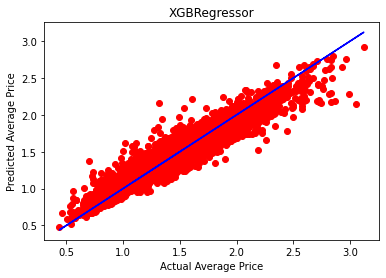

In [183]:
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('XGBRegressor')

# Saving the Model

In [184]:
import joblib
joblib.dump(model,'avacadoprice.obj')

['avacadoprice.obj']

In [ ]:
#now we shall move onto the classification problem

# CLASSIFICATION TASK = FIND REGION

In [185]:
df.head()

,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,752
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,745
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,738
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,731
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,724


# DIVIDE DATA INTO FEATURES & LABEL (CLASSFICATION)¶

In [327]:
#diving the columns in feature and label from the backup dataset df3
X = df3.drop(columns=['region'])
y = df3['region']

In [328]:
#FEATURE SELECTION

#Using SelectKBest feature seleciton Method
from sklearn.feature_selection import SelectKBest,f_classif
best_features=SelectKBest(f_classif, k=9)
fit=best_features.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
#concatenate dataframes
feature_scores = pd.concat([df_columns,df_scores],axis=1)
#name output columns
feature_scores.columns = ['Feaure_Name','Score']
#print 17 best features
print(feature_scores.nlargest(11,'Score'))

     Feaure_Name       Score
1    TotalVolume  319.035278
3          f4225  308.834412
6      SmallBags  298.998145
2          f4046  295.483768
5      TotalBags  295.176645
7     Large Bags  254.735012
4          f4770  208.050643
8     XLargeBags  123.297554
0   AveragePrice   69.383811
9           type    0.000496
10          Time    0.000065


In [ ]:
#The vision behind choosing selectKBest feature selection was to remove highly correlated features, but type and time both are not correlated much with any other feature.
#Rest of all the features seem to be highly important, hence we will continue. 

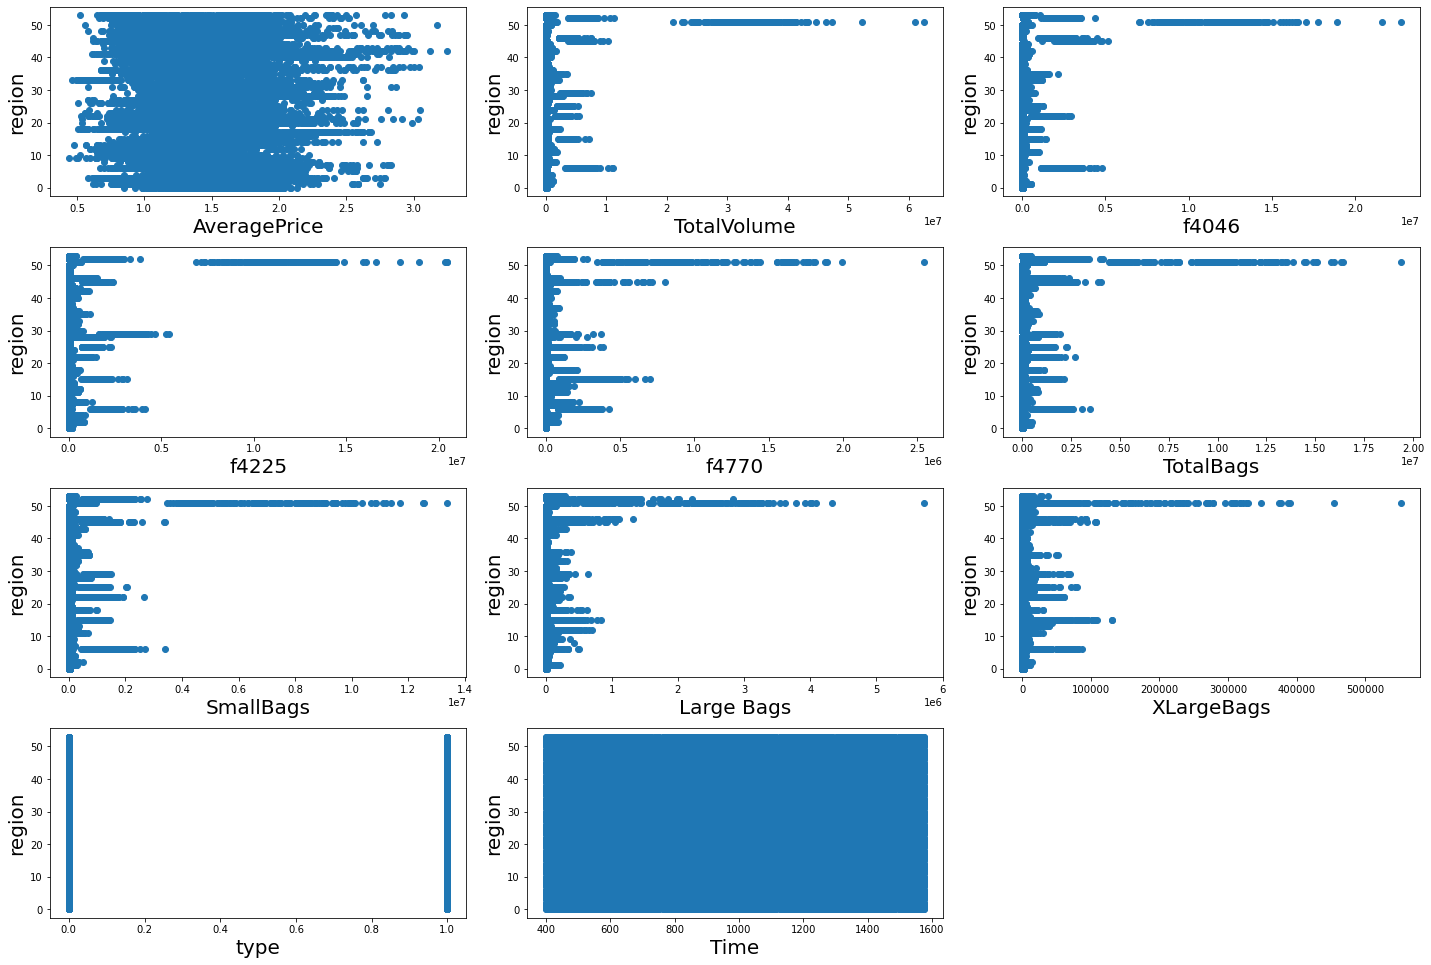

In [281]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
	if plotnumber<=30: 
		ax=plt.subplot(10,3,plotnumber)
		plt.scatter(X[column],y)
		plt.xlabel(column,fontsize=20)
		plt.ylabel('region', fontsize=20)
	plotnumber+=1
plt.tight_layout()

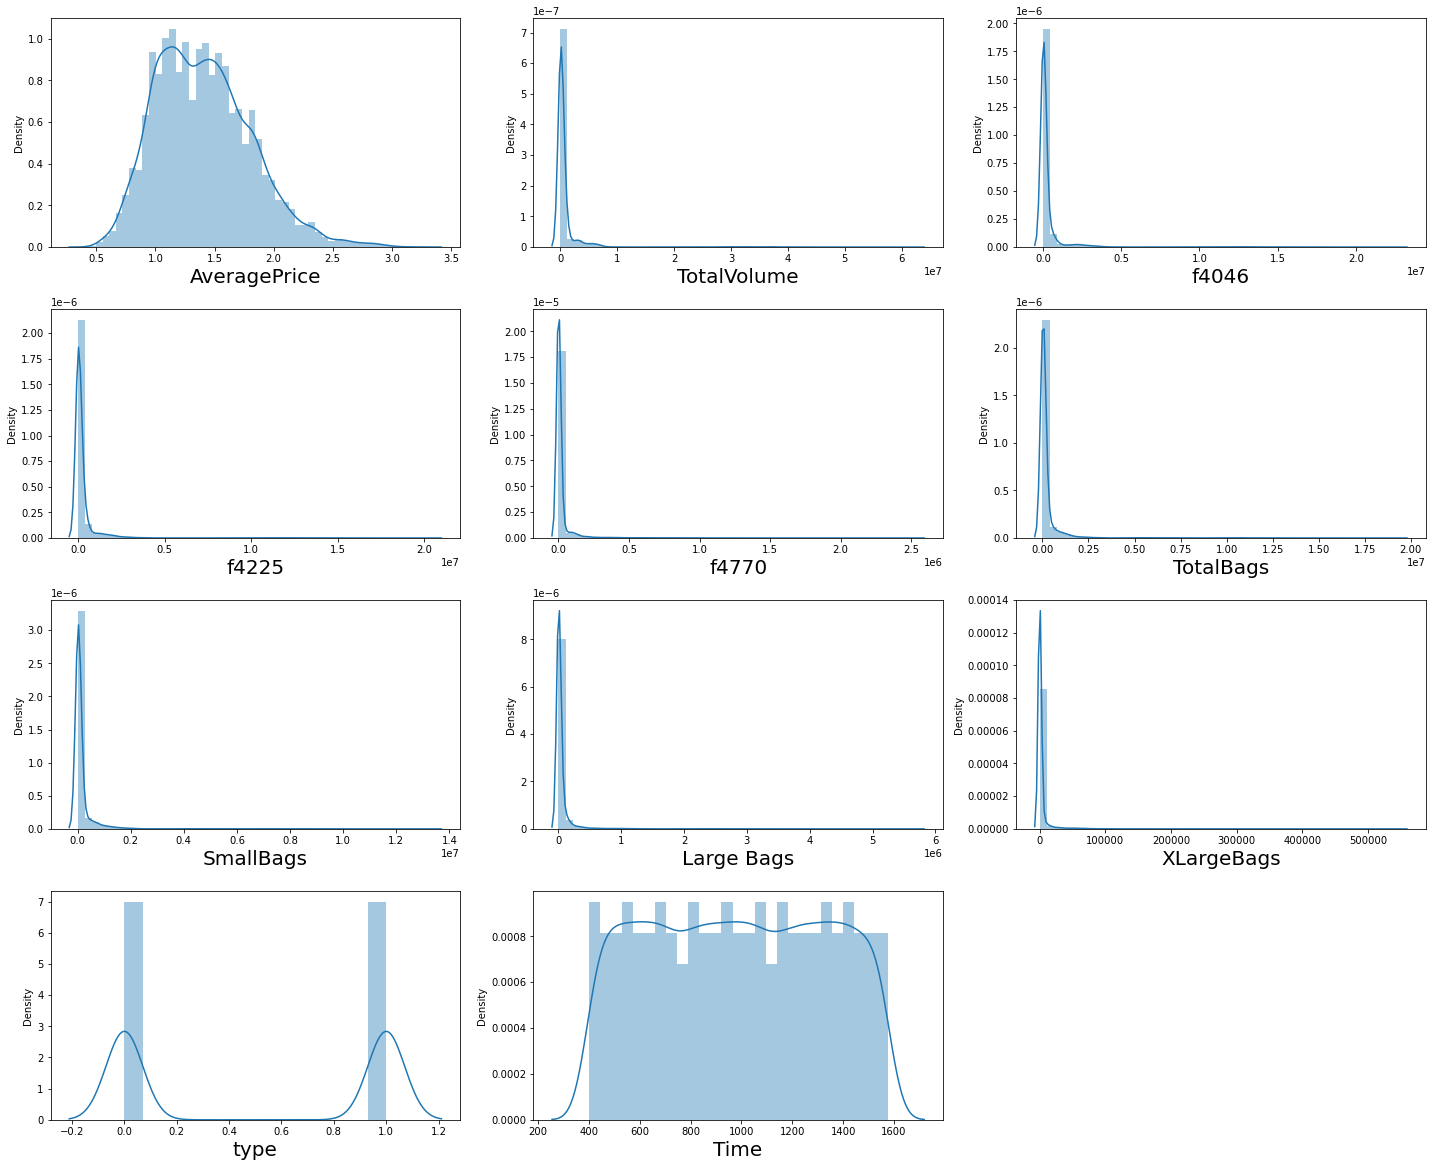

In [282]:
#Visualise the distribution of data in the feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [329]:
#As we can see there is skewness in our dataset, lets try to remove skewness

In [330]:
#Checking skewness of the features
df3.skew().sort_values(ascending=False)

XLargeBags      13.139751
f4770           10.159396
Large Bags       9.796455
TotalBags        9.756072
SmallBags        9.540660
TotalVolume      9.007687
f4225            8.942466
f4046            8.648220
AveragePrice     0.580303
Time             0.003328
type             0.000329
region           0.000030
dtype: float64

In [331]:
#We can see skewness in few of our columns, we will remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
df3_new = power_transform(df3)
df3=pd.DataFrame(df2_new,columns=df3.columns)
df3.skew().sort_values(ascending=False) #validating that the skewness is removed


XLargeBags      0.793520
AveragePrice    0.580303
f4770           0.032184
TotalVolume     0.011171
SmallBags       0.007058
type            0.000329
region          0.000030
TotalBags      -0.001626
f4225          -0.017740
f4046          -0.022679
Large Bags     -0.073809
Time           -0.113117
dtype: float64

In [332]:
#As we can see most of the skewness in the features have been removed

In [333]:
df3['region'] = df['region'] #giving back the original values of target column
X = df3.drop(columns=['region'])
y = df3['region']

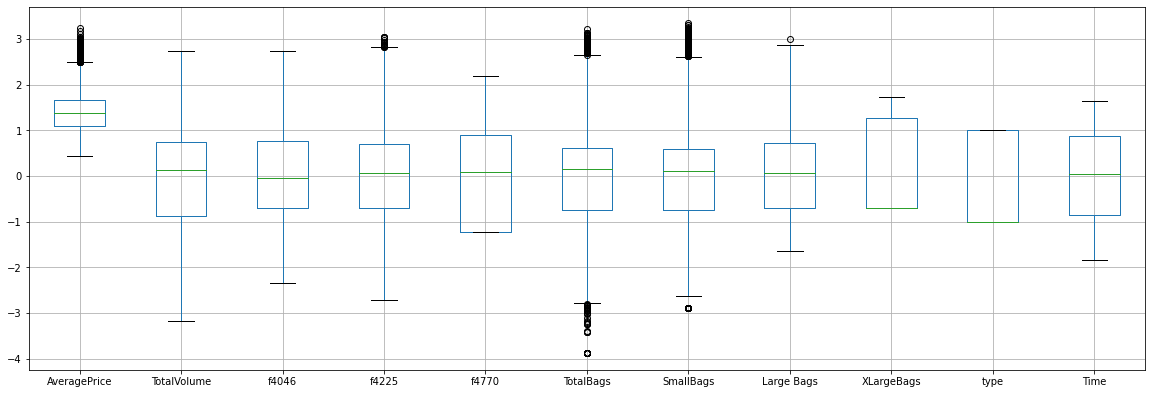

In [334]:
##Visualizing the outliers using BOXPLOT
X.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [335]:
#There are outliers in AveragePrice (higher quantile) , TotalBags (Both) , SmallBags (Higher Quantile)
#We will use IQR method to remove these outliers

In [336]:

#removing outliers using IQR
from scipy.stats import iqr
#find the IQR
#1st Quantile
q1=df2.quantile(0.25)
#3rd Quantile
q3=df2.quantile(0.75)

iqr = q3-q1

In [337]:
#feature = AveragePrice (outlier in higher side)
AveragePrice_high = (q3.AveragePrice+(1.5*iqr.AveragePrice)) 
index=np.where(df3['AveragePrice']>AveragePrice_high)
df3=df3.drop(df3.index[index])
df3.reset_index()

,index,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
0,0,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,0.0,-0.650329
1,1,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,0.0,-0.672084
2,2,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,0.0,-0.693891
3,3,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,0.0,-0.715752
4,4,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,0.0,-0.737667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18035,18244,1.63,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,53.0,1.515480
18036,18245,1.71,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,53.0,1.499971
18037,18246,1.87,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,53.0,1.481858
18038,18247,1.93,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,53.0,1.463723


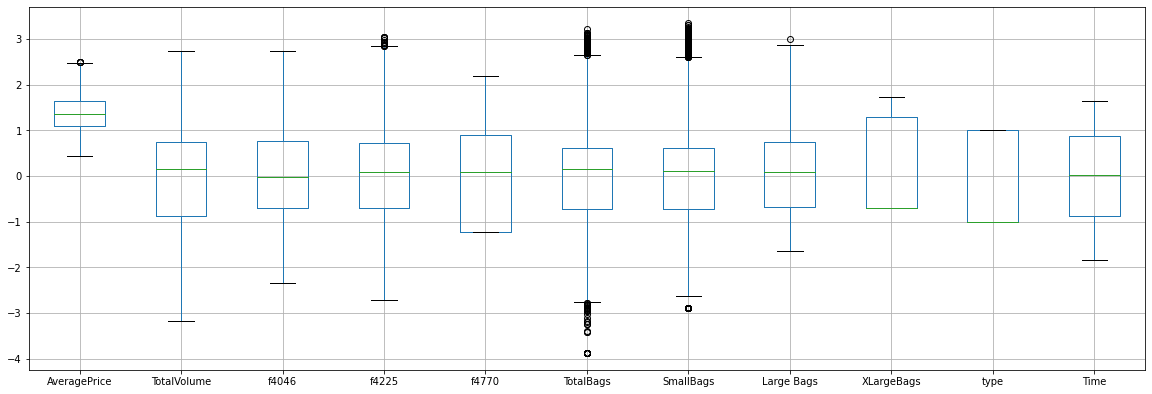

In [338]:
X = df3.drop(columns=['region'])
##Visualizing the outliers using BOXPLOT after using IQR
X.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [339]:
#feature = TotalBags (outlier in higher side)
TotalBags_high = (q3.TotalBags+(1.5*iqr.TotalBags)) 
index=np.where(df3['TotalBags']>TotalBags_high)
df3=df3.drop(df3.index[index])
df3.reset_index()

,index,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
0,0,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,0.0,-0.650329
1,1,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,0.0,-0.672084
2,2,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,0.0,-0.693891
3,3,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,0.0,-0.715752
4,4,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,0.0,-0.737667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18035,18244,1.63,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,53.0,1.515480
18036,18245,1.71,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,53.0,1.499971
18037,18246,1.87,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,53.0,1.481858
18038,18247,1.93,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,53.0,1.463723


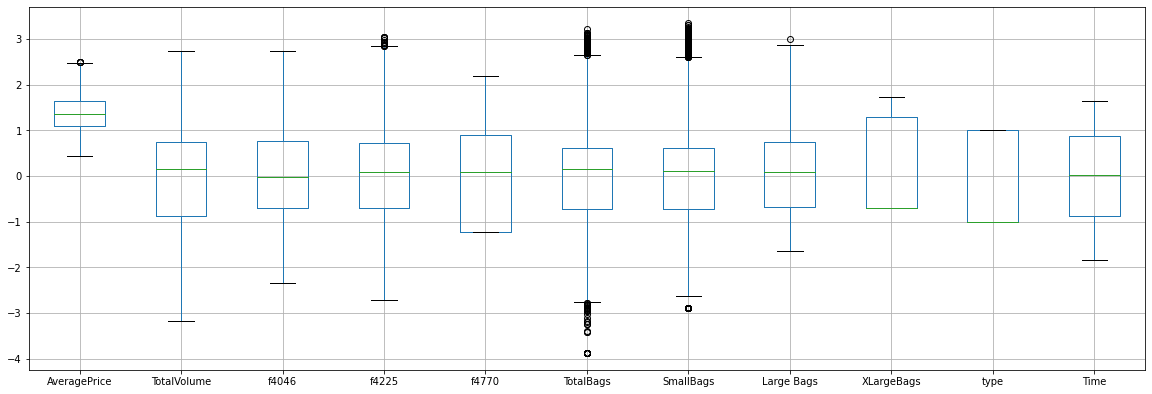

In [340]:
X = df3.drop(columns=['region'])
##Visualizing the outliers using BOXPLOT after using IQR
X.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [341]:
#feature = TotalBags (outlier in lower side)
TotalBags_low=(q1.TotalBags-(1.5*iqr.TotalBags))
index=np.where(df3['TotalBags']<TotalBags_low)
df3=df3.drop(df3.index[index])
df3.reset_index()

,index,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
0,0,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,0.0,-0.650329
1,1,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,0.0,-0.672084
2,2,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,0.0,-0.693891
3,3,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,0.0,-0.715752
4,4,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,0.0,-0.737667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18035,18244,1.63,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,53.0,1.515480
18036,18245,1.71,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,53.0,1.499971
18037,18246,1.87,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,53.0,1.481858
18038,18247,1.93,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,53.0,1.463723


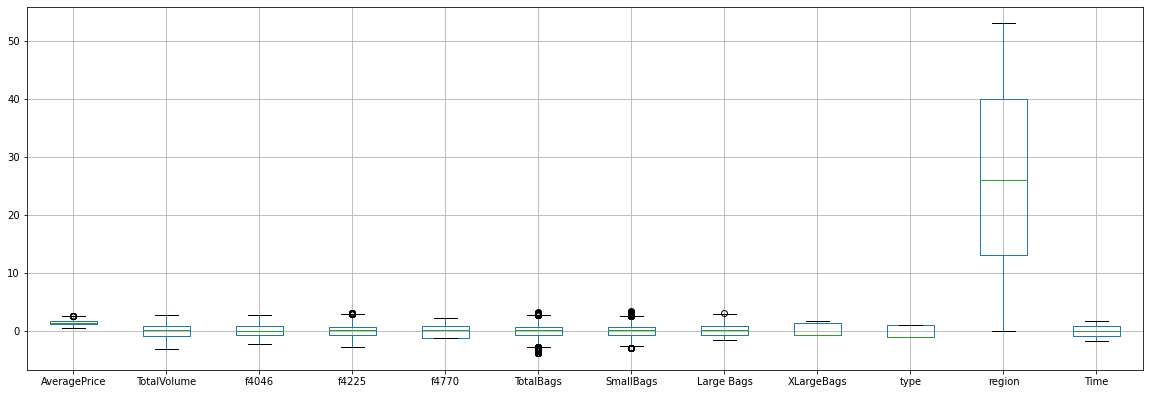

In [342]:
##Visualizing the outliers using BOXPLOT after using IQR
df3.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [343]:
df3.shape

(18040, 12)

In [344]:
#loss of data

print(((18249-17880)/18249)*100)

2.0220286043070854


In [345]:
#We have incurred a loss of 2% of the data, and hence we will not remove more outliers.

# Dividing into Feature & Label (Classification)

In [346]:
X = df3.drop(columns=['region'])
y = df3['region']

0.0     338
51.0    338
44.0    338
2.0     338
39.0    338
34.0    338
46.0    338
15.0    338
18.0    338
26.0    338
9.0     338
49.0    338
11.0    338
10.0    338
32.0    338
12.0    338
13.0    338
22.0    338
27.0    338
45.0    338
8.0     338
38.0    338
19.0    338
29.0    338
25.0    338
4.0     338
35.0    338
16.0    338
23.0    338
30.0    338
28.0    337
14.0    336
52.0    336
6.0     336
33.0    336
31.0    335
20.0    334
50.0    334
41.0    334
24.0    334
5.0     333
48.0    333
21.0    332
1.0     331
53.0    330
40.0    330
3.0     329
36.0    328
7.0     328
37.0    324
17.0    323
43.0    322
47.0    321
42.0    284
Name: region, dtype: int64


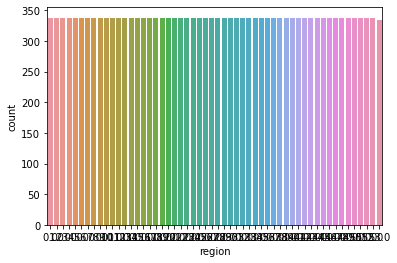

In [347]:
#count of each class (Attrition(1) = 237, NoAttrition(0)=1233)
ax=sns.countplot(x="region", data=df)
print(df3['region'].value_counts())

In [348]:
#post outlier removal still the value count of all the classes is almost same, except region no. 51 which is 217.
#since there are 338 values for each region we will move along with the situation as it will generate more outliers otherwise.

# APPLYING CLASSIFICATION MODELS & FINDING BEST FIT MODEL¶

In [349]:
#Data Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [325]:
#Finding best random_state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAccu=0 #maximum accuracy
maxRS=0 #best random state value for which max accuracy is acheived 
for i in range(1,200):
	x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=i)
	LR = LogisticRegression()
	LR.fit(x_train,y_train)
	predrf=LR.predict(x_test)
	acc=accuracy_score(y_test,predrf)
	if acc>maxAccu:
		maxAccu=acc
		maxRS=i
print("Best accuracy is", maxAccu,"on Random State", maxRS)

Best accuracy is 0.5523862788963461 on Random State 191


In [359]:
#CREATING TRAIN-TEST SPLIT
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=191)

In [360]:
#LOGISTIC REGRESSION
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 54.41611234294162
[[ 59   0   0 ...   0   0   0]
 [  0  43   0 ...   0   0   0]
 [  0   0  62 ...   0   0   1]
 ...
 [  0   0   0 ... 105   0   0]
 [  0   0   0 ...   1 103   0]
 [  0   2   2 ...   0   0  19]]
              precision    recall  f1-score   support

         0.0       0.73      0.60      0.66        99
         1.0       0.27      0.47      0.35        91
         2.0       0.70      0.68      0.69        91
         3.0       0.55      0.28      0.37       106
         4.0       0.46      0.52      0.49       103
         5.0       0.56      0.51      0.53       107
         6.0       0.81      0.88      0.84       112
         7.0       0.61      0.67      0.64       104
         8.0       0.68      0.74      0.71       105
         9.0       0.59      0.76      0.66       108
        10.0       0.44      0.38      0.41       105
        11.0       0.56      0.63      0.60        93
        12.0       0.46      0.55      0.50       105
        13.0       0.40 

In [369]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_dt)*100)
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

Accuracy 78.14116777531412
[[ 65   0   0 ...   0   0   0]
 [  0  61   0 ...   0   0   1]
 [  0   0  81 ...   0   0   3]
 ...
 [  0   0   0 ... 105   0   0]
 [  0   0   0 ...   0 102   0]
 [  0   1   4 ...   0   0  70]]
              precision    recall  f1-score   support

         0.0       0.82      0.66      0.73        99
         1.0       0.73      0.67      0.70        91
         2.0       0.86      0.89      0.88        91
         3.0       0.86      0.74      0.79       106
         4.0       0.84      0.85      0.85       103
         5.0       0.70      0.71      0.70       107
         6.0       0.96      0.96      0.96       112
         7.0       0.81      0.85      0.83       104
         8.0       0.94      0.94      0.94       105
         9.0       0.82      0.82      0.82       108
        10.0       0.68      0.65      0.66       105
        11.0       0.92      0.88      0.90        93
        12.0       0.84      0.84      0.84       105
        13.0       0.74 

In [362]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_rf)*100)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Accuracy 90.39172209903917
[[ 88   0   0 ...   0   0   0]
 [  0  76   0 ...   0   0   0]
 [  0   0  90 ...   0   0   0]
 ...
 [  0   0   0 ... 105   0   0]
 [  0   0   0 ...   1 112   0]
 [  0   1   0 ...   0   0  89]]
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89        99
         1.0       0.84      0.84      0.84        91
         2.0       0.97      0.99      0.98        91
         3.0       0.94      0.88      0.91       106
         4.0       0.98      0.97      0.98       103
         5.0       0.86      0.82      0.84       107
         6.0       0.98      1.00      0.99       112
         7.0       0.91      0.91      0.91       104
         8.0       0.99      0.97      0.98       105
         9.0       0.88      0.89      0.88       108
        10.0       0.86      0.85      0.85       105
        11.0       0.93      0.96      0.94        93
        12.0       0.95      0.98      0.97       105
        13.0       0.90 

In [363]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_svc)*100)
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

Accuracy 80.93126385809313
[[ 94   0   0 ...   0   0   0]
 [  0  47   0 ...   0   0   2]
 [  0   0  90 ...   0   0   0]
 ...
 [  0   0   0 ... 105   0   0]
 [  0   0   0 ...   1 112   0]
 [  0   0   0 ...   0   0  71]]
              precision    recall  f1-score   support

         0.0       0.73      0.95      0.83        99
         1.0       0.48      0.52      0.50        91
         2.0       0.96      0.99      0.97        91
         3.0       0.87      0.72      0.79       106
         4.0       0.93      0.87      0.90       103
         5.0       0.91      0.70      0.79       107
         6.0       0.99      1.00      1.00       112
         7.0       0.85      0.78      0.81       104
         8.0       0.97      0.98      0.98       105
         9.0       0.73      0.82      0.77       108
        10.0       0.67      0.64      0.65       105
        11.0       0.85      0.95      0.90        93
        12.0       0.92      0.98      0.95       105
        13.0       0.62 

In [375]:
#KNN CLASSIFIER
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
cfm=confusion_matrix(y_test,y_pred_knn)
cr=classification_report(y_test,y_pred_knn,digits=2)
print("Accuracy", accuracy_score(y_test,y_pred_knn)*100)
print(cfm)
print(cr)


Accuracy 86.4560236511456
[[ 95   0   0 ...   0   0   0]
 [  0  74   0 ...   0   0   0]
 [  0   0  89 ...   0   0   0]
 ...
 [  0   0   0 ... 105   0   0]
 [  0   0   0 ...   1 109   0]
 [  0   1   0 ...   0   0  84]]
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88        99
         1.0       0.73      0.81      0.77        91
         2.0       0.94      0.98      0.96        91
         3.0       0.91      0.76      0.83       106
         4.0       0.90      0.96      0.93       103
         5.0       0.86      0.79      0.82       107
         6.0       0.98      0.99      0.99       112
         7.0       0.82      0.89      0.86       104
         8.0       0.93      0.98      0.95       105
         9.0       0.83      0.83      0.83       108
        10.0       0.74      0.85      0.79       105
        11.0       0.86      0.94      0.90        93
        12.0       0.92      0.91      0.92       105
        13.0       0.77  

In [ ]:
SUMMARY:- 
LOGISTIC REGRESSION:  ACCURACY SCORE=  54.42 
DECISION TREE CLASSIFIER: ACCURACY SCORE= 78.14
RANDOM FOREST CLASSIFIER: ACCURACY SCORE=  90.39
SVC: ACCURACY SCORE=  80.93
KNN : ACCURACY SCORE = 86.45

In [376]:
#CROSS VALIDATION
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR,X,y,cv=5)
print("Cross validation score of Logistic Regression Model", scr.mean())
scr2 = cross_val_score(rf,X,y,cv=5)
print("Cross validation score of Random Forest Model", scr2.mean())
scr3 = cross_val_score(dt,X,y,cv=5)
print("Cross validation score of Decision Tree Model", scr3.mean())
scr4 = cross_val_score(svc,X,y,cv=5)
print("Cross validation score of SVC Model", scr4.mean())
scr5 = cross_val_score(knn,X,y,cv=5)
print("Cross validation score of KNN Model", scr5.mean())

Cross validation score of Logistic Regression Model 0.4021618625277162
Cross validation score of Random Forest Model 0.6938470066518847
Cross validation score of Decision Tree Model 0.572339246119734
Cross validation score of SVC Model 0.6496674057649667
Cross validation score of KNN Model 0.5978381374722839


In [ ]:
CV SCORES
LOGISTIC REGRESSION = 0.40
DECISION TREE CLASSIFIER =  0.56
RANDOM FOREST CLASSIFIER = 0.69
SVC = 0.65
KNN = 0.60

In [ ]:
#RandomForestClassifier has an accuracy score of 90.39 and cv score of 0.69; Hence, RF is the best model here
#Lets try to improve the accuracy score by using GridSearchCV over all the models

In [379]:
#Let's tune the parameter using GridSearchCV
#RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=41)
clf= RandomForestClassifier()
params = { 'n_estimators': [13,15],
			'criterion': ['entropy', 'gini'],
			'max_depth': [10,15],
			'min_samples_split':[10,11],
			'min_samples_leaf':[5,6]
		}
grid=GridSearchCV(clf,param_grid=params)
grid.fit(x_train,y_train)
print('best_params=>', grid.best_params_)
clf=grid.best_estimator_
clf.fit(x_train,y_train)
y_pred_gscv=clf.predict(x_test)
rf_conf_mat=confusion_matrix(y_test,y_pred_gscv)
print('\n Conf Mat =>''\n', rf_conf_mat)
print('\n' ' Accuracy rf Normal =>', accuracy_score(y_test,y_pred_gscv))

report = classification_report(y_test,y_pred_gscv)
print(report)

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}

 Conf Mat =>
 [[ 94   0   0 ...   0   0   0]
 [  0  88   0 ...   0   0   1]
 [  0   0  93 ...   0   0   0]
 ...
 [  0   0   0 ... 101   0   0]
 [  0   0   0 ...   1 107   0]
 [  0   0   2 ...   0   0  75]]

 Accuracy rf Normal => 0.8592017738359202
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       102
         1.0       0.78      0.75      0.77       117
         2.0       0.93      0.92      0.93       101
         3.0       0.91      0.88      0.89        98
         4.0       0.87      0.96      0.91        94
         5.0       0.81      0.75      0.78       104
         6.0       0.99      0.99      0.99        92
         7.0       0.84      0.90      0.87       102
         8.0       0.98      0.93      0.95        96
         9.0       0.90      0.88      0.89        98
        10.0       0.72      0.

# Saving the Model

In [380]:
import joblib
joblib.dump(clf,'avacadoregion.obj')

['avacadoregion.obj']